# Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Load CIFAR-10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 48s 0us/step


# Find number of unique classes

In [3]:
num_classes = len(np.unique(y_train))
print("Number of unique classes:", num_classes)

Number of unique classes: 10


# Defines class names 

In [4]:
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Visualize random images with labels

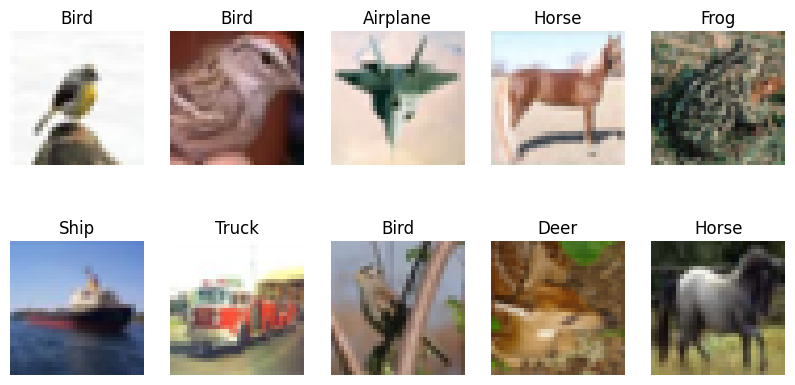

In [5]:
plt.figure(figsize=(10,5))

for i in range(10):
    index = np.random.randint(0, X_train.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[index])
    plt.title(class_names[y_train[index][0]])
    plt.axis('off')

plt.show()


# Checking if dataset is balanced

In [6]:
class_counts = np.bincount(y_train.flatten())
print(class_counts)

[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


# Plot bar chart

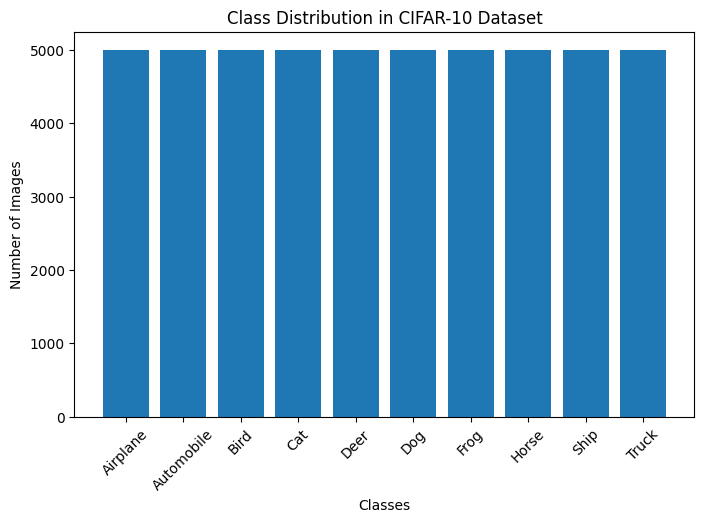

In [7]:
plt.figure(figsize=(8,5))
plt.bar(class_names, class_counts)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in CIFAR-10 Dataset")
plt.xticks(rotation=45)
plt.show()


# Normalize the images

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0


# Convert labels to categorical (one-hot encoding)

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


# Add Data Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [20]:
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test_cat)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.6221 - loss: 1.0755 - val_accuracy: 0.6893 - val_loss: 0.9172
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6379 - loss: 1.0358 - val_accuracy: 0.6799 - val_loss: 0.9426
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 200ms/step - accuracy: 0.6457 - loss: 1.0147 - val_accuracy: 0.6925 - val_loss: 0.9006
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6538 - loss: 0.9874 - val_accuracy: 0.6953 - val_loss: 0.9078
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6610 - loss: 0.9750 - val_accuracy: 0.7065 - val_loss: 0.8761
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6634 - loss: 0.9585 - val_accuracy: 0.7061 - val_loss: 0.8579
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6685 - loss: 0.9459 - val_accuracy: 0.7029 - val_loss: 0.8769
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - accuracy: 0.6770 - loss: 0.9311

# Build a simple CNN model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model

In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train the model

In [30]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - accuracy: 0.4280 - loss: 1.5888 - val_accuracy: 0.5188 - val_loss: 1.3557
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.5658 - loss: 1.2301 - val_accuracy: 0.6038 - val_loss: 1.1505
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6204 - loss: 1.0845 - val_accuracy: 0.6315 - val_loss: 1.0701
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6557 - loss: 0.9869 - val_accuracy: 0.6461 - val_loss: 1.0406
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6802 - loss: 0.9245 - val_accuracy: 0.6558 - val_loss: 1.0104
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.6992 - loss: 0.8667 - val_accuracy: 0.6546 - val_loss: 1.0111
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.7165 - loss: 0.8180 - val_accuracy: 0.6728 - val_loss: 0.9667
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7308 - loss: 0.7782 - 

# Evaluate the model

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6902 - loss: 0.9248
Test Accuracy: 0.6901999711990356


# Plot Accuracy Graph

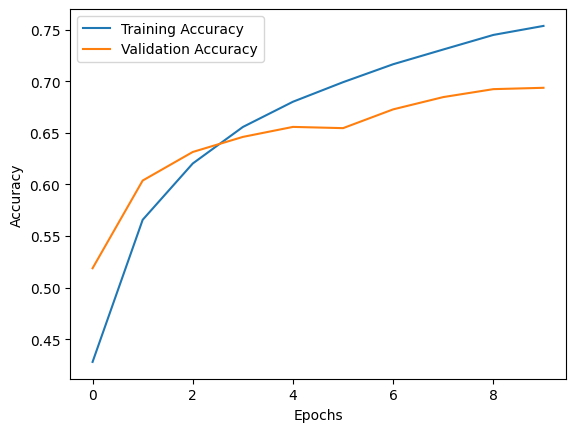

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
